# Midterm 1 - Assignment 6
## Diego Arcelli - 647979

Implementation of the convolution of a Laplacian of a Gaussian for blob detection

## Importing the required modules
The images will be first loaded with Pillow and then converted into numpy array to apply the convolution

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import pi

## Convolution and kernel generation functions
Definition of the functions that implement the convolution operation and the LoG filter generation.
The convolution function requires as parameters:
1. An image passed as a numpy array
2. The filter passed as a numpy array
3. A boolean variable to decide wether to zero-pad or not the image

If the image is padded then the resulting image will have the same shape of the input image.
The function can also handle the convolution of multi-channel images, by applying seprarately the convolution to each channel.

The log_kernel function requires as parametets:
1. The shape of the kernel passed like a tuple of the form $(w,h)$ where $w$ is the width and $h$ is the heigth of the filter
2. The a real value which will be the value of the $\sigma$ parameter of the LoG filter


In [39]:
def convolution(image: np.array, kernel : np.array, pad=True) -> np.array:
    # get width and height of the kernel
    k_w, k_h = kernel.shape

    # check if the image is in gray scale or RGB
    if (len(image.shape) == 2):
        # if the image is in gray scale we add the channel dimension
        image = image.reshape(tuple(list(image.shape) + [1]))

    w, h, c = image.shape

    # check if the image needs to be padded or not
    if pad:
        w, h = (w + k_w - 1, h + k_w - 1)
        padded = np.zeros(shape=(w, h, c))
        padded[k_w//2:k_w//2+w-k_w+1, k_h//2:k_h//2+h-k_h+1, :] = image
        image = padded

    out = np.zeros(shape=(w-k_w+1, h-k_h+1, c))
    for i in range(w-k_w):
        for j in range(h-k_h):
            for z in range(c):
                out[i, j, z] = np.sum(np.multiply(image[i:i+k_w, j:j+k_h, z], kernel))
    
    if out.shape[2] == 1:
        out = out.reshape(out.shape[:-1])

    return out
    

# function which generates the LoG kernel
def log_kernel(shape=(3,3), sigma=1.0) -> np.array:
    w, h = shape
    x,y = np.meshgrid(np.linspace(-(w-1)/2,(w-1)/2, w), np.linspace(-(h-1)/2,(h-1)/2, h))
    sigma_2 = sigma*sigma
    z = -(x*x + y*y)/(2*sigma_2)
    return -(1/(sigma_2*sigma_2))*(1+z)*np.exp(z)

## Defining the test function
Function to run the LoG filter on four different images with different values of the $\sigma$ parameter.

In [40]:
def plot_image(image : np.array, rgb=True):
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    if rgb:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

def test_image(image : np.array, sigmas : list[int]):
    plot_image(np.asarray(image))
    image = np.asarray(image.convert("L"))/255
    for sigma in sigmas:
        print("Sigma = ", sigma)
        kernel = log_kernel((20, 20), sigma)
        conv_image = convolution(image, kernel, False)
        output = (conv_image*255).astype(np.uint8)
        plot_image(output, False)


## Run the experiments
We test each images for the following values of $\sigma$: ${1, 1.5, 2, 2.5, 3, 3.5, 4}$

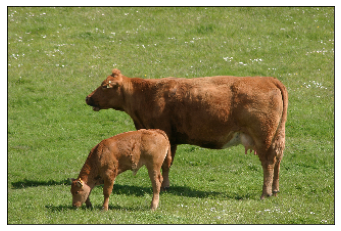

Sigma =  1


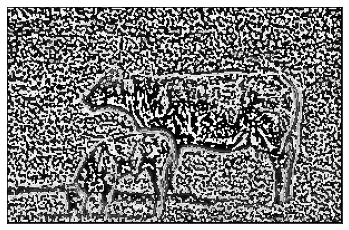

Sigma =  1.5


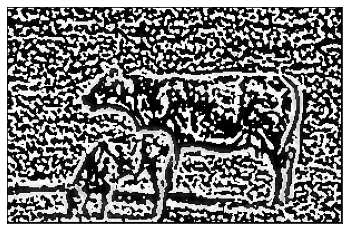

Sigma =  2


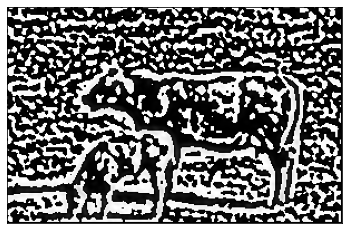

Sigma =  2.5


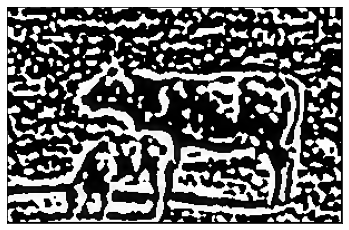

Sigma =  3


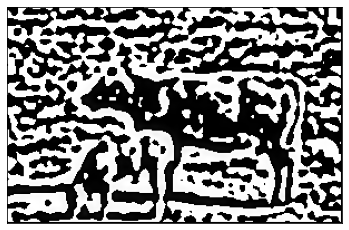

Sigma =  3.5


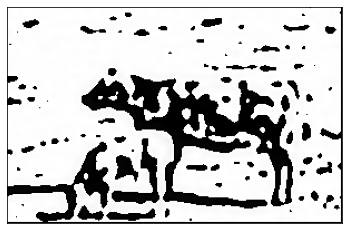

Sigma =  4


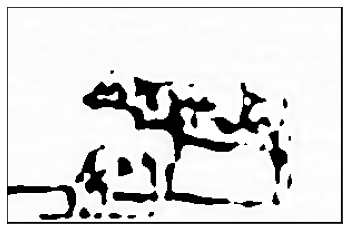

In [41]:
test_image(Image.open("Images/1_9_s.bmp"), [1, 1.5, 2, 2.5, 3, 3.5, 4])

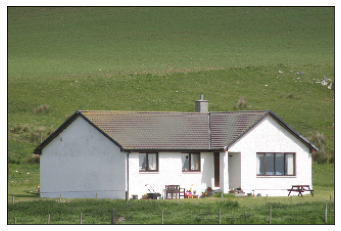

Sigma =  1


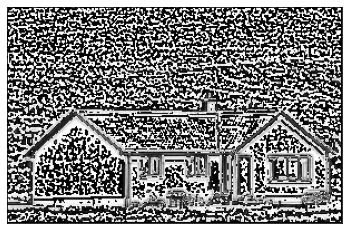

Sigma =  1.5


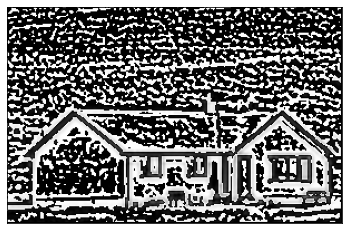

Sigma =  2


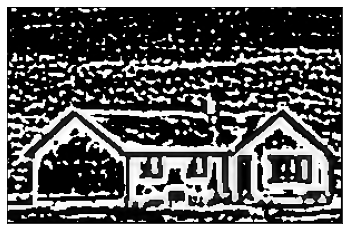

Sigma =  2.5


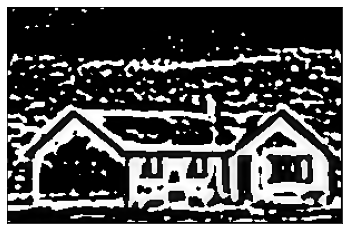

Sigma =  3


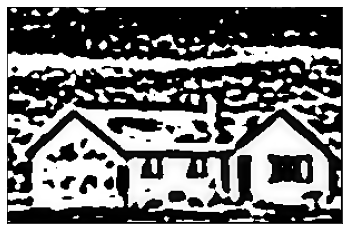

Sigma =  3.5


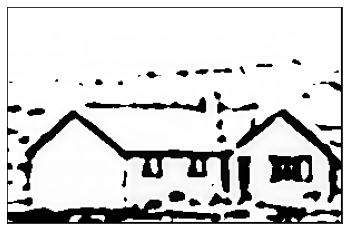

Sigma =  4


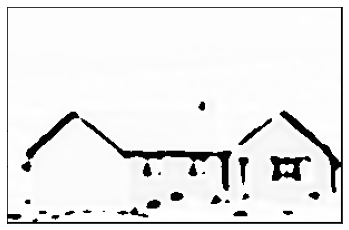

In [42]:
test_image(Image.open("Images/3_12_s.bmp"), [1, 1.5, 2, 2.5, 3, 3.5, 4])

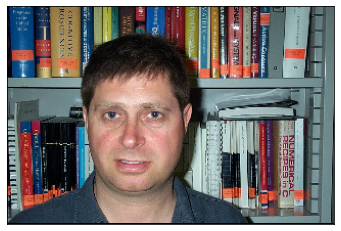

Sigma =  1


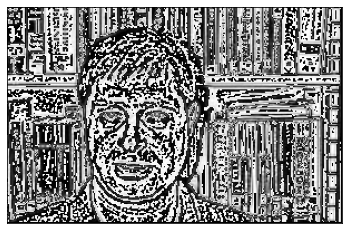

Sigma =  1.5


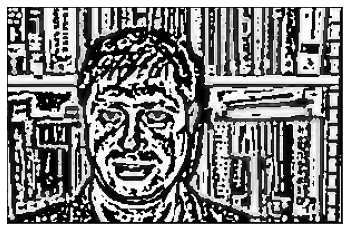

Sigma =  2


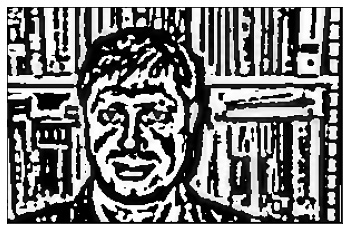

Sigma =  2.5


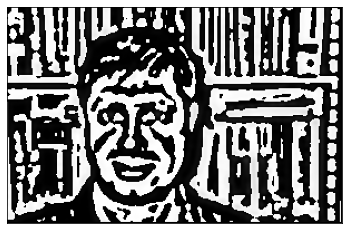

Sigma =  3


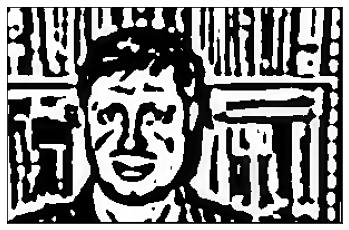

Sigma =  3.5


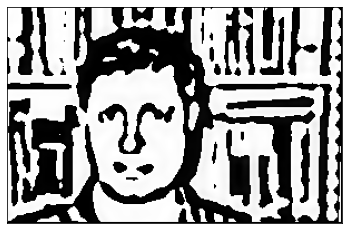

Sigma =  4


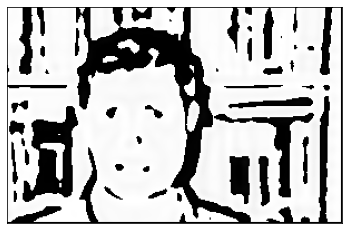

In [43]:
test_image(Image.open("Images/6_1_s.bmp"), [1, 1.5, 2, 2.5, 3, 3.5, 4])

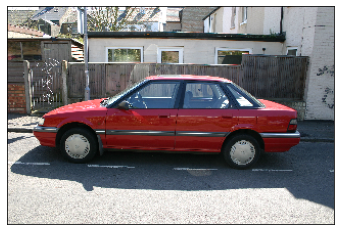

Sigma =  1


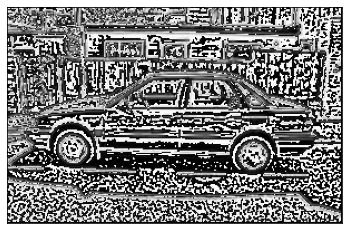

Sigma =  1.5


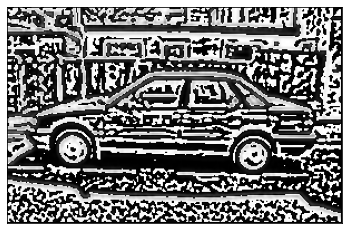

Sigma =  2


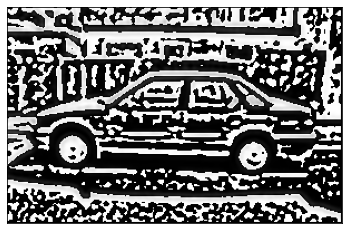

Sigma =  2.5


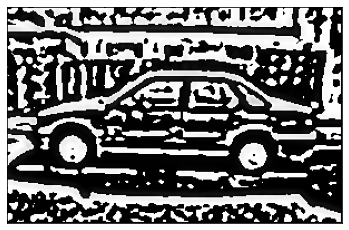

Sigma =  3


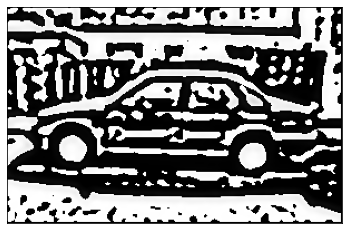

Sigma =  3.5


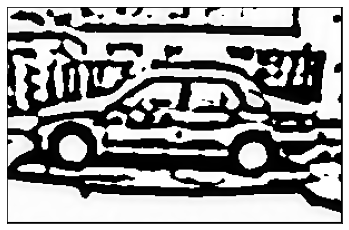

Sigma =  4


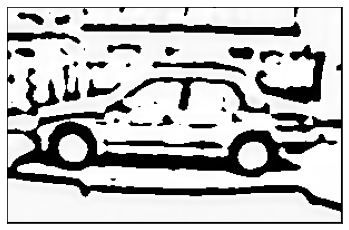

In [44]:
test_image(Image.open("Images/7_1_s.bmp"), [1, 1.5, 2, 2.5, 3, 3.5, 4])

## Conclusions
As expected, we can notice that by increasing the value of $\sigma$ we detect larger blobs in the images, and that's because the LoG filter has maximum response when centered on a cicle of radius $\sqrt 2\sigma$.